In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [7]:
df = pd.read_csv('cleveland.csv', header = None)

In [8]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [10]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

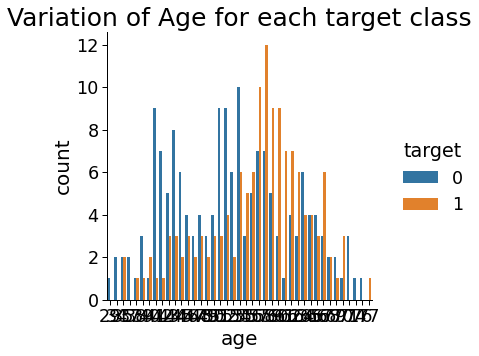

In [11]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

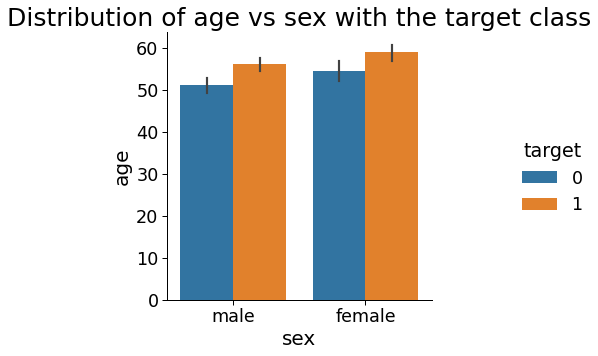

In [12]:
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [13]:
df['sex'] = df.sex.map({'female': 0, 'male': 1})

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
classifier = SVC(kernel = 'rbf') #Radial Basis Function
classifier.fit(X_train, y_train)

SVC()

In [18]:
y_pred = classifier.predict(X_test)

In [27]:
cm_test = confusion_matrix(y_pred, y_test)
print(cm_test)

[[32  9]
 [ 3 17]]


In [23]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print(cm_train)

[[124  13]
 [  5 100]]


In [21]:
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for svm = 0.9256198347107438
Accuracy for test set for svm = 0.8032786885245902
